In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
mergin_cleaned_df = pd.read_csv('merged_cleaned_agg_outliers_obs_datasets.csv')

Model Performance:
Mean Absolute Error (MAE): 279498.28
Mean Squared Error (MSE): 1043543575668.75
Root Mean Squared Error (RMSE): 1021539.81
R-squared (R2): 0.42

Feature Importance:
           Feature  Importance
1       avg_d_kbps    0.507262
0  light_intensity    0.492738


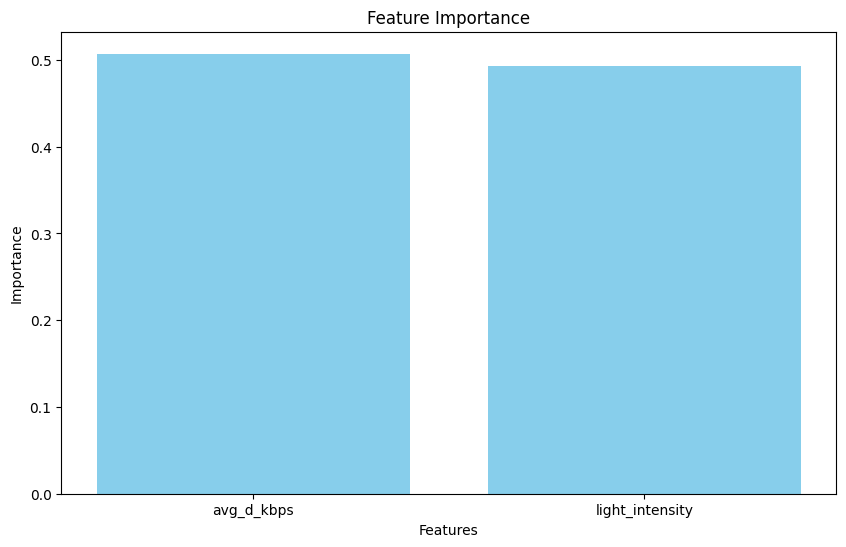

In [3]:
# Prediction Model: Random Forest
mergin_cleaned_df['Economic_Growth_Proxy'] = (
    mergin_cleaned_df['avg_d_kbps'] * mergin_cleaned_df['devices']
)

features = ['light_intensity', 'avg_d_kbps']
target = 'Economic_Growth_Proxy'

for feature in features:
    if feature not in mergin_cleaned_df.columns:
        raise ValueError(f"Feature '{feature}' is missing in the dataset.")

X = mergin_cleaned_df[features]
y = mergin_cleaned_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()